### Load UGRID

In [1]:
from gridgeo import GridGeo

url = ("http://crow.marine.usf.edu:8080/thredds/dodsC/"
       "FVCOM-Nowcast-Agg.nc")

ugrid = GridGeo(url)

ugrid

<Grid type and size: ugrid, 98818>

### Load SGRID

In [2]:
url = ("http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/jcwarner/"
       "Projects/Sandy/triple_nest/00_dir_NYB05.ncml")

sgrid = GridGeo(url)

sgrid

<Grid type and size: sgrid, 36464>

### The grid object a `__geo_interface__` property

In [3]:
type(ugrid.__geo_interface__)

dict

In [4]:
sgrid.__geo_interface__

{'coordinates': [(((-74.23895238574335, 39.64650991839148),
    (-74.23244075683068, 39.64935729112978),
    (-74.23578206027406, 39.65717176413316),
    (-74.242293731671, 39.654324446624415),
    (-74.23895238574335, 39.64650991839148)),),
  (((-74.23244075683068, 39.64935729112978),
    (-74.22592912791802, 39.65220466386808),
    (-74.22927038887713, 39.6600190816419),
    (-74.23578206027406, 39.65717176413316),
    (-74.23244075683068, 39.64935729112978)),),
  (((-74.22592912791802, 39.65220466386808),
    (-74.21941749900536, 39.655052036606385),
    (-74.22275871748018, 39.662866399150644),
    (-74.22927038887713, 39.6600190816419),
    (-74.22592912791802, 39.65220466386808)),),
  (((-74.21941749900536, 39.655052036606385),
    (-74.2129058700927, 39.65789940934469),
    (-74.21624704608324, 39.66571371665938),
    (-74.22275871748018, 39.662866399150644),
    (-74.21941749900536, 39.655052036606385)),),
  (((-74.2129058700927, 39.65789940934469),
    (-74.20639424118004, 39.

/home/filipe/.virtualenvs/iris/lib/python2.7/site-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


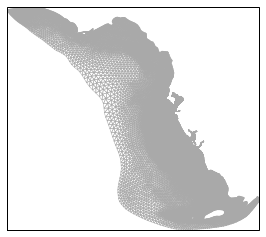

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

from gridgeo import rasterize

img = rasterize(ugrid.polygons)

i = plt.imshow(img)

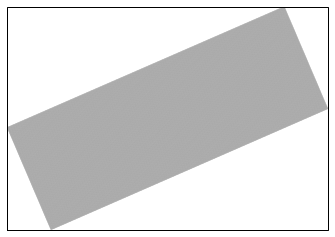

In [6]:
img = rasterize(sgrid.polygons)

i = plt.imshow(img)

### There is also a vector representation

(Due to the high number of points the vector representation can crash the notebook.  Showing only a few points here.)

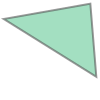

In [7]:
ugrid.polygons[0]

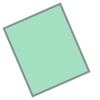

In [8]:
sgrid.polygons[0]

### The `properties` and `methods` are:

The `py{u,s}grid` object:

In [9]:
sgrid.grid

The mesh name:

In [10]:
ugrid.mesh

'ugrid'

The reference to the netCDF file/URL path or object:

In [11]:
sgrid.nc

'http://geoport.whoi.edu/thredds/dodsC/clay/usgs/users/jcwarner/Projects/Sandy/triple_nest/00_dir_NYB05.ncml'

The shapely `MultiPolygon`

In [12]:
type(ugrid.polygons)

shapely.geometry.multipolygon.MultiPolygon

In [13]:
properties = dict(fill='#fd7d11',
                  fill_opacity=0.2,
                  stroke_opacity=1)

geojson = ugrid.to_geojson(**properties)

geojson['properties']

{'description': '',
 'fill': '#fd7d11',
 'fill-opacity': 0.6,
 'marker-color': '7e7e7e',
 'marker-size': 'medium',
 'marker-symbol': '',
 'stroke': '555555',
 'stroke-opacity': 1,
 'stroke-width': 2,
 'title': 'ugrid'}

### We can save the geojson to a file

In [14]:
import json

kw = dict(sort_keys=True, indent=4, separators=(',', ': '))
with open('ugrid.geojson','w') as f:
    json.dump(geojson, f, **kw)

In [15]:
geojson = sgrid.to_geojson(**properties)

kw = dict(sort_keys=True, indent=4, separators=(',', ': '))
with open('sgrid.geojson','w') as f:
    json.dump(geojson, f, **kw)

### or to a shapefile:

In [16]:
import fiona

schema = {'geometry': 'MultiPolygon',
          'properties': {'name': 'str:{}'.format(len(ugrid.mesh))}}

with fiona.open('ugrid.shp', 'w', 'ESRI Shapefile', schema) as f:
    f.write({'geometry': ugrid.__geo_interface__,
             'properties': {'name': ugrid.mesh}})

In [17]:
import fiona

schema = {'geometry': 'MultiPolygon',
          'properties': {'name': 'str:{}'.format(len(sgrid.mesh))}}

with fiona.open('sgrid.shp', 'w', 'ESRI Shapefile', schema) as f:
    f.write({'geometry': sgrid.__geo_interface__,
             'properties': {'name': sgrid.mesh}})